# CWUR Time Series Analysis

## 1. Importing Libraries and Data

In [52]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [53]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [54]:
# Import dataset

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_top200.csv'))

In [55]:
# Check to see if it was imported correctly

df_cwur

,Unnamed: 0,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year
0,0,1,Harvard University,United States of America,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,United States of America,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,2,3,Stanford University,United States of America,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,4,5,California Institute of Technology,United States of America,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1395,196,University of Kansas,United States of America,85,228,91,218,212,161,161,235.0,127,47.52,2015
596,1396,197,University of Cologne,Germany,12,367,132,201,204,138,146,161.0,421,47.52,2015
597,1397,198,University of Georgia,United States of America,86,93,188,172,181,132,234,256.0,82,47.50,2015
598,1398,199,University of Liverpool,United Kingdom,15,176,179,207,154,172,128,174.0,377,47.49,2015


## 2. Data Wrangling, Cleaning, and Subsetting

In [56]:
# Removing the 'Unnamed: 0' column

df_cwur = df_cwur.drop(columns = ['Unnamed: 0'])

In [57]:
df_cwur.dtypes

world_rank_CWUR                int64
university_name               object
country                       object
national_rank                  int64
quality_of_education_rank      int64
alumni_employment_rank         int64
quality_of_faculty_rank        int64
publications_rank              int64
influence_rank                 int64
citations_rank                 int64
broad_impact_rank            float64
patents_rank                   int64
overall_score_CWUR           float64
year                           int64
dtype: object

In [58]:
# Create a subset with only relevant numerical columns, grouped by 'year' and 'country' columns first

df_cwur_sub1 = df_cwur.groupby(['year', 'country'], as_index=False)[['country',
                                         'world_rank_CWUR', 
                                         'quality_of_education_rank',
                                         'alumni_employment_rank',
                                         'quality_of_faculty_rank',
                                         'publications_rank',
                                         'influence_rank',
                                         'citations_rank',
                                         'broad_impact_rank',
                                         'patents_rank']].mean()

In [59]:
df_cwur_sub1.head()

,year,country,world_rank_CWUR,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank
0,2012,Australia,93.000000,101.000000,101.000000,101.000000,61.500000,91.000000,87.000000,NaN,57.5
1,2012,Canada,47.666667,90.666667,97.666667,60.333333,22.666667,30.333333,37.666667,NaN,101.0
2,2012,Denmark,93.000000,101.000000,101.000000,60.000000,85.000000,66.000000,101.000000,NaN,101.0
3,2012,Finland,89.000000,96.000000,101.000000,79.000000,62.000000,64.000000,54.000000,NaN,101.0
4,2012,France,65.200000,39.200000,54.000000,77.600000,82.400000,90.400000,96.400000,NaN,101.0


In [60]:
df_cwur_sub1.shape

(86, 11)

In [61]:
# Create a further subset that just includes the year, country, and world ranking columns

df_cwur_timerank = df_cwur_sub1[['year', 'country', 'world_rank_CWUR']]

In [62]:
# Create a subset that only includes universities from the USA

df_cwur_USA = df_cwur_timerank.loc[df_cwur_timerank['country'] == 'United States of America']

df_cwur_USA

,year,country,world_rank_CWUR
15,2012,United States of America,42.396552
33,2013,United States of America,43.807018
59,2014,United States of America,81.894118
85,2015,United States of America,83.034884


In [63]:
# Drop the 'country' column since it is unnecessary now

df_cwur_USA = df_cwur_USA.drop(columns = ['country'])

In [64]:
# Set the "year" column as the index

from datetime import date

df_cwur_USA['datetime'] = pd.to_datetime(df_cwur_USA['year'], format='%Y') # Create a datetime column from "year.""
df_cwur_USA = df_cwur_USA.set_index('datetime') # Set the datetime as the index of the dataframe.
df_cwur_USA.drop(['year'], axis=1, inplace=True) # Drop the "year" column.
df_cwur_USA.head()

,world_rank_CWUR
datetime,
2012-01-01,42.396552
2013-01-01,43.807018
2014-01-01,81.894118
2015-01-01,83.034884


## 3. Create a line chart of the data

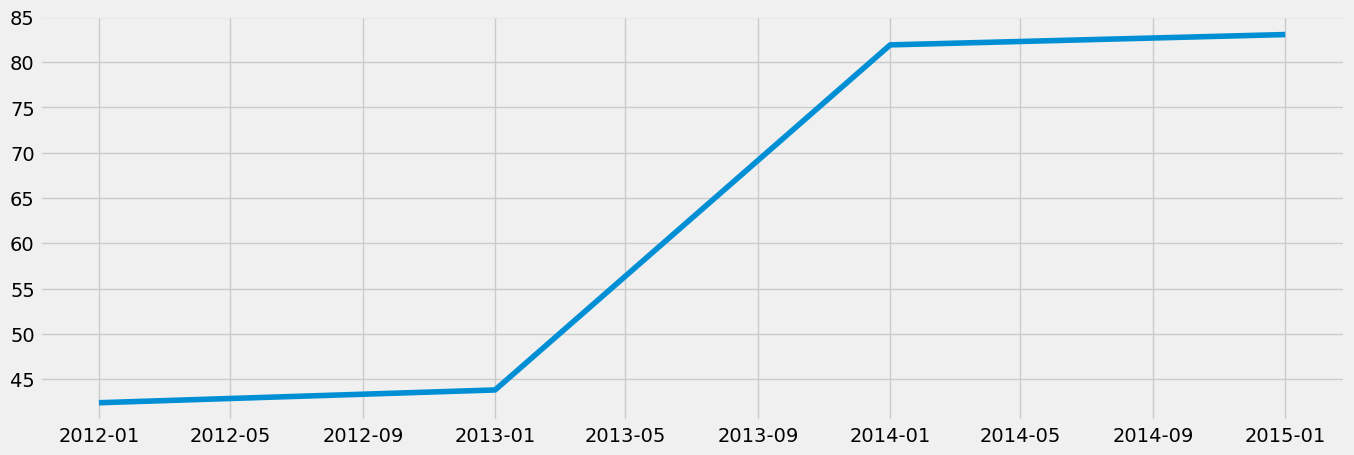

In [65]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_cwur_USA)

Due to the small number of years available in the data, the line chart for the average world rankings of American Universities seems rather simplistic. There is a notable increase from 2013 to 2014, but this is likely due to the fact that the data only included universities from the top 100 universities in 2012 and 2013, whereas data from 2014 and 2015 included top 200 universities which could have increased the average rankings. The USA is still consistent and has the largest amount of top universities out of all countries by a large margin. 

## 4. Decompose the data's components

In [66]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_cwur_USA, model='additive')

In [67]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

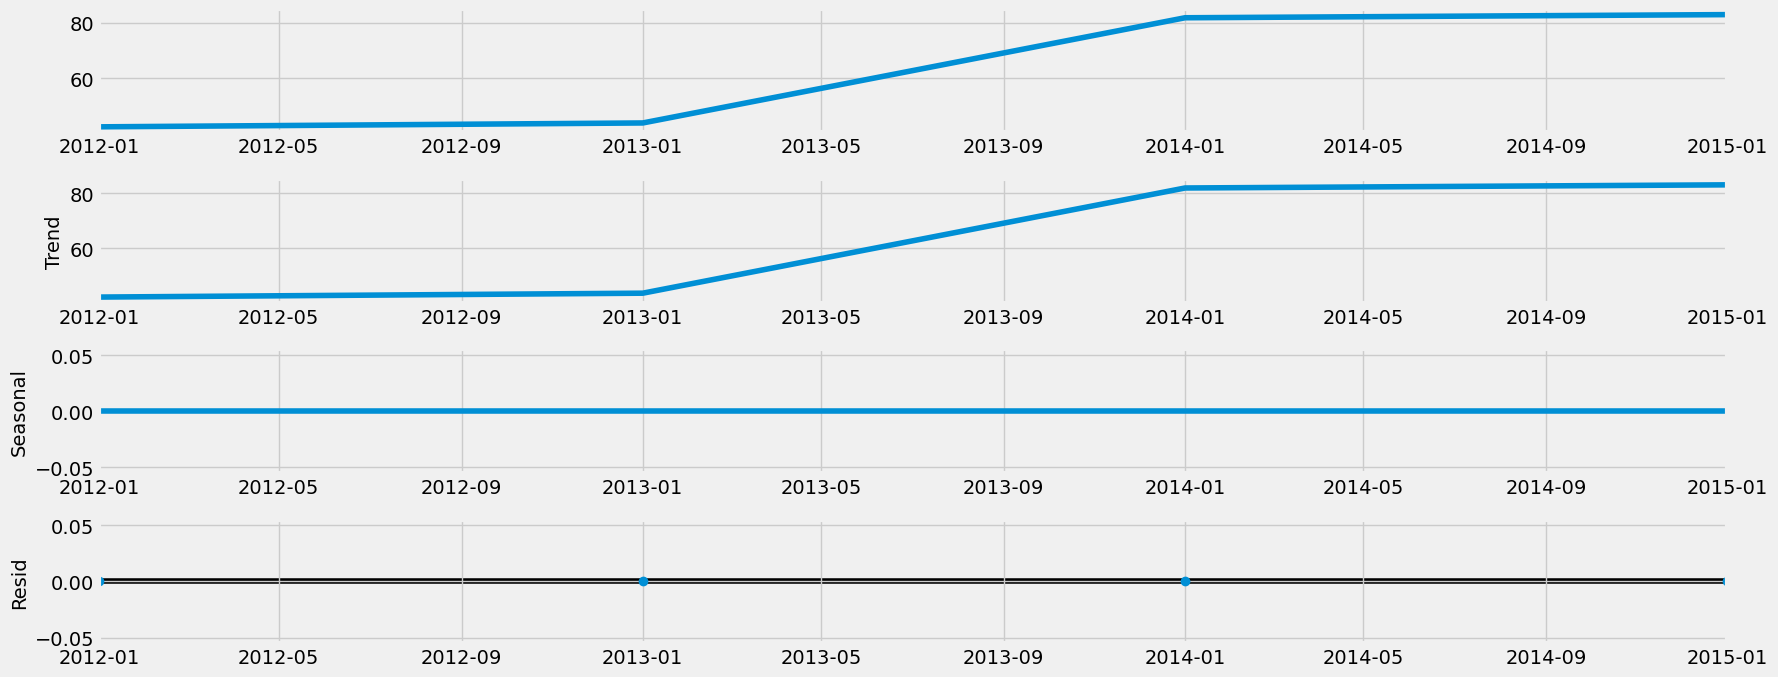

In [68]:
# Plot the separate components

decomposition.plot()
plt.show()

There is a positive trend even though it looks like more of a jump in the graph. There is a very small increase in ranking from 2012 to 2013 and a similar small increase from 2014 to 2015. There appears to be no seasonality and no residual noise. The data looks to be non-stationary due to the overall positive trend but may not be reliable due to the lack of time data points. 

## 5. Conduct a Dickey-Fuller Test to check for stationarity. Interpret the results and reference your null hypothesis.

In [69]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_cwur_USA['world_rank_CWUR'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.544312
p-value                         0.883075
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


Test Statistic: -0.544
5% Critical Value: -5.778

Because the Test Statistic is greater than the Critical Value, the null hypothesis cannot be rejected. There is a unit root in the data and the data is non-stationary. 

## 6. Conduct a round of differencing on the data and repeat the check.

In [70]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

df_cwur_USA_diff = df_cwur_USA - df_cwur_USA.shift(1)

In [71]:
# Remove the missing values in order to run the Dickey-Fuller test. 

df_cwur_USA_diff.dropna(inplace = True)

In [72]:
df_cwur_USA_diff.head()

,world_rank_CWUR
datetime,
2013-01-01,1.410466
2014-01-01,38.087100
2015-01-01,1.140766


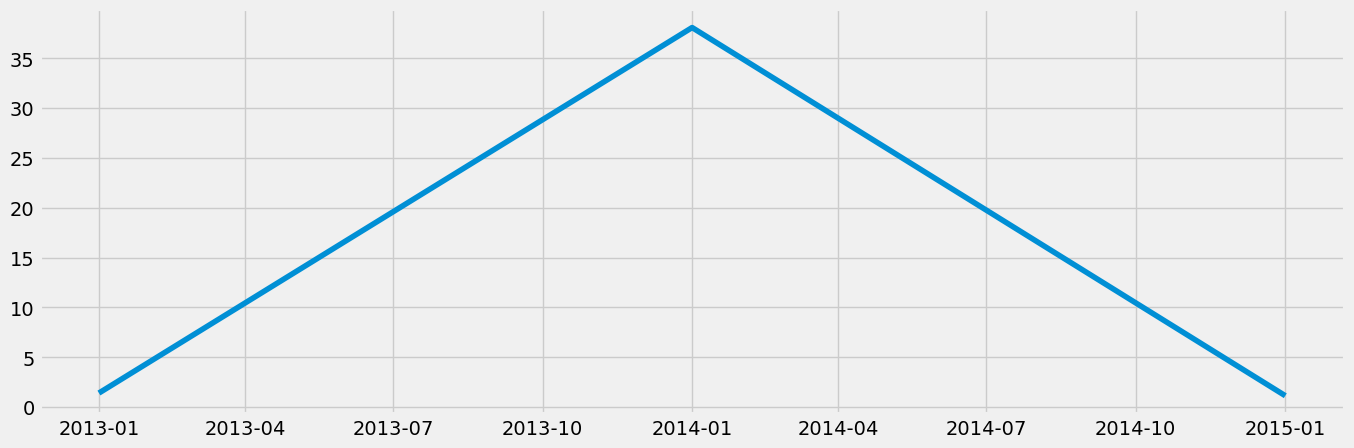

In [73]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_cwur_USA_diff)

In [74]:
dickey_fuller(df_cwur_USA_diff)

Dickey-Fuller Stationarity test:


ValueError: sample size is too short to use selected regression component

The above error shows that the dataframe is simply too small to undergo the Dickey-Fuller test. Unfortunately, time series analysis cannot be completed on this dataframe. 

## 7. Check out the data's autocorrelations

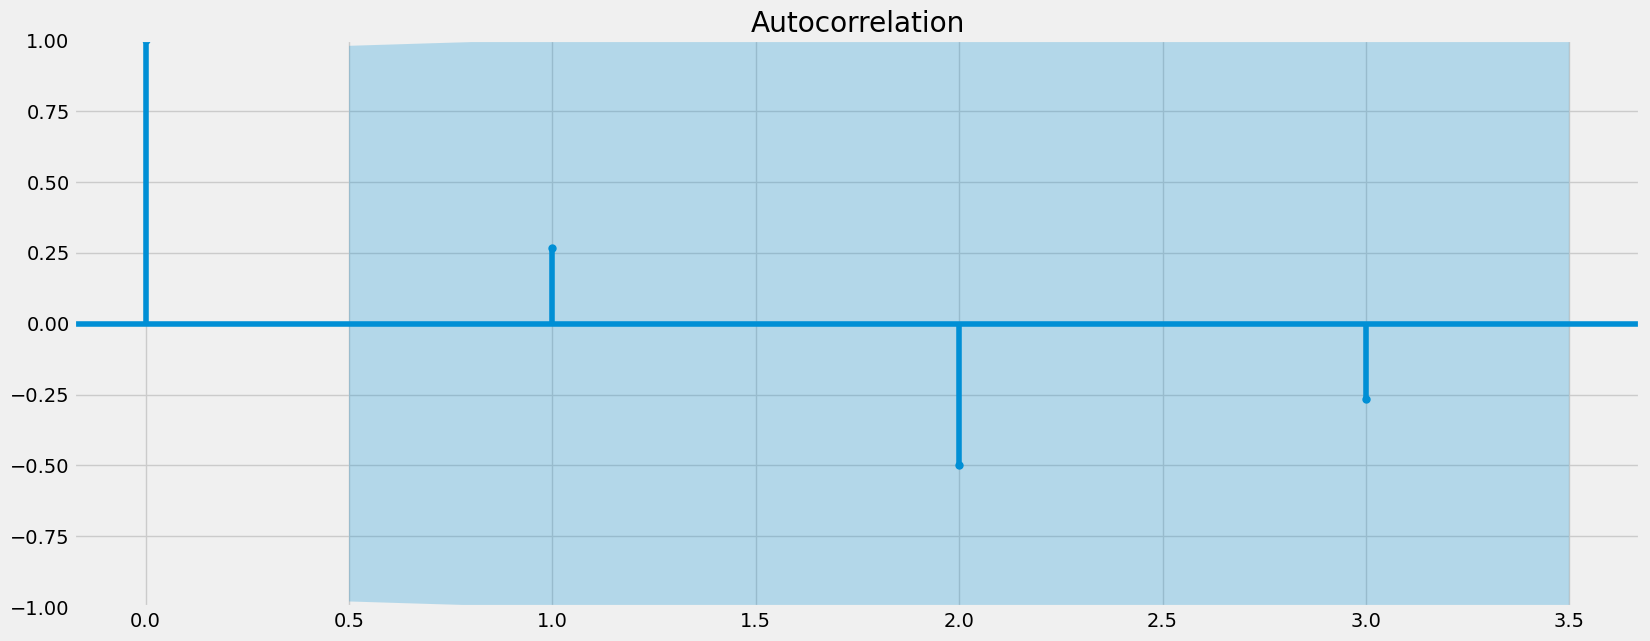

In [77]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_cwur_USA)
plt.show()

There is only one line that it out of bounds of the confidence interval, which indicates that the data is not correlated with each other and is stationary. However, this is likely due to the fact that there are only 5 datapoints, so this autocorrelation graph may not be very accurate. 

## 8. Final steps (saving files)

In [76]:
# Export the aggregate dataframe of world rankings since it could possibly be useful in the future

df_cwur_timerank.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_top200_timecountrygrouped.csv'))